In [4]:
import pandas as pd

url_heart_rate = 'https://raw.githubusercontent.com/George-glor/health_analysis/main/heartrate.csv'
url_calories = 'https://raw.githubusercontent.com/George-glor/health_analysis/main/calories.csv'
url_sleep = 'https://raw.githubusercontent.com/George-glor/health_analysis/main/sleep.csv'
url_steps = 'https://raw.githubusercontent.com/George-glor/health_analysis/main/steps%201.csv'

# Load each CSV into a pandas DataFrame
heart_rate = pd.read_csv(url_heart_rate)
calories = pd.read_csv(url_calories)
sleep = pd.read_csv(url_sleep)
steps = pd.read_csv(url_steps)

# Display the first few rows of each DataFrame
print("Heart Rate Data:")
print(heart_rate.head())

print("\nCalories Data:")
print(calories.head())

print("\nSleep Data:")
print(sleep.head())

print("\nSteps Data:")
print(steps.head())


Heart Rate Data:
           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101

Calories Data:
           Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  1503960366   4/15/2016      1745
4  1503960366   4/16/2016      1863

Sleep Data:
           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   To

In [6]:
# Convert the date columns to datetime format
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])
calories['ActivityDay'] = pd.to_datetime(calories['ActivityDay'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
steps['ActivityDay'] = pd.to_datetime(steps['ActivityDay'])

# Confirm that the conversion worked by checking the data types
print("Heart Rate Data Types:")
print(heart_rate.dtypes)

print("\nCalories Data Types:")
print(calories.dtypes)

print("\nSleep Data Types:")
print(sleep.dtypes)

print("\nSteps Data Types:")
print(steps.dtypes)


Heart Rate Data Types:
Id                int64
Time     datetime64[ns]
Value             int64
dtype: object

Calories Data Types:
Id                      int64
ActivityDay    datetime64[ns]
Calories                int64
dtype: object

Sleep Data Types:
Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

Steps Data Types:
Id                      int64
ActivityDay    datetime64[ns]
StepTotal               int64
dtype: object


In [8]:
# Step 2: Aggregating heart rate data to daily averages
heart_rate['Date'] = heart_rate['Time'].dt.date  
daily_heart_rate = heart_rate.groupby(['Id', 'Date']).agg({'Value': 'mean'}).reset_index()
daily_heart_rate.rename(columns={'Value': 'AvgHeartRate'}, inplace=True)

# Merge the datasets on Id and date
daily_heart_rate['Date'] = pd.to_datetime(daily_heart_rate['Date'])
merged_data = pd.merge(daily_heart_rate, calories, left_on=['Id', 'Date'], right_on=['Id', 'ActivityDay'], how='inner')
merged_data = pd.merge(merged_data, sleep, left_on=['Id', 'Date'], right_on=['Id', 'SleepDay'], how='inner')
merged_data = pd.merge(merged_data, steps, left_on=['Id', 'Date'], right_on=['Id', 'ActivityDay'], how='inner')

# Check if columns exist before dropping
columns_to_drop = ['ActivityDay', 'SleepDay']
for column in columns_to_drop:
    if column in merged_data.columns:
        merged_data.drop(columns=[column], inplace=True)

# Display the merged data to ensure everything looks correct
print("Merged Data:")
print(merged_data.head())


Merged Data:
           Id       Date  AvgHeartRate ActivityDay_x  Calories  \
0  2026352035 2016-04-17     68.656250    2016-04-17      1214   
1  2026352035 2016-04-25     99.505814    2016-04-25      1576   
2  2026352035 2016-05-02     84.134571    2016-05-02      1690   
3  2026352035 2016-05-09     98.233901    2016-05-09      1869   
4  2347167796 2016-04-13     73.812905    2016-04-13      2038   

   TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed ActivityDay_y  \
0                  1                 437             498    2016-04-17   
1                  1                 506             531    2016-04-25   
2                  1                 511             543    2016-05-02   
3                  1                 531             556    2016-05-09   
4                  1                 467             531    2016-04-13   

   StepTotal  
0        838  
1       6017  
2       7018  
3      10685  
4      10352  


In [9]:
# Drop redundant 'ActivityDay_x' and 'ActivityDay_y' columns
merged_data.drop(columns=['ActivityDay_x', 'ActivityDay_y'], inplace=True)

# Rename columns for consistency
merged_data.rename(columns={
    'Date': 'Date', 
    'AvgHeartRate': 'AvgHeartRate', 
    'Calories': 'Calories', 
    'TotalSleepRecords': 'SleepRecords', 
    'TotalMinutesAsleep': 'MinutesAsleep', 
    'TotalTimeInBed': 'TimeInBed', 
    'StepTotal': 'TotalSteps'
}, inplace=True)

# Check for missing values
missing_values = merged_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Display the cleaned data
print("Cleaned Data:")
print(merged_data.head())


Missing values in each column:
Id               0
Date             0
AvgHeartRate     0
Calories         0
SleepRecords     0
MinutesAsleep    0
TimeInBed        0
TotalSteps       0
dtype: int64
Cleaned Data:
           Id       Date  AvgHeartRate  Calories  SleepRecords  MinutesAsleep  \
0  2026352035 2016-04-17     68.656250      1214             1            437   
1  2026352035 2016-04-25     99.505814      1576             1            506   
2  2026352035 2016-05-02     84.134571      1690             1            511   
3  2026352035 2016-05-09     98.233901      1869             1            531   
4  2347167796 2016-04-13     73.812905      2038             1            467   

   TimeInBed  TotalSteps  
0        498         838  
1        531        6017  
2        543        7018  
3        556       10685  
4        531       10352  


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 4: Feature Engineering

# Define target variable: 1 for high stress, 0 for low stress
stress_threshold = 85  =
merged_data['HighStress'] = (merged_data['AvgHeartRate'] > stress_threshold).astype(int)

# Features for the model
X = merged_data[['AvgHeartRate', 'Calories', 'MinutesAsleep', 'TimeInBed', 'TotalSteps']]
y = merged_data['HighStress']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display first few rows of scaled training data
print("Scaled Training Features:")
print(X_train_scaled[:5])


Scaled Training Features:
[[ 1.22332229 -0.11379531  0.42712971  0.26825679  1.67850095]
 [-0.01649468 -0.94617283 -0.08412109 -0.18687406 -0.71574543]
 [-1.38148566  0.41431539  1.60829535  1.53434807 -0.77515839]
 [ 0.45128998 -0.58158879  0.18031898 -0.02137193  0.47706553]
 [-0.09938484  0.6435208   0.18913365  0.37583318 -0.69370514]]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 5: Building and training a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9636
Confusion Matrix:
[[51  0]
 [ 2  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.50      0.67         4

    accuracy                           0.96        55
   macro avg       0.98      0.75      0.82        55
weighted avg       0.97      0.96      0.96        55



In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.75      0.86         4

    accuracy                           0.98        55
   macro avg       0.99      0.88      0.92        55
weighted avg       0.98      0.98      0.98        55



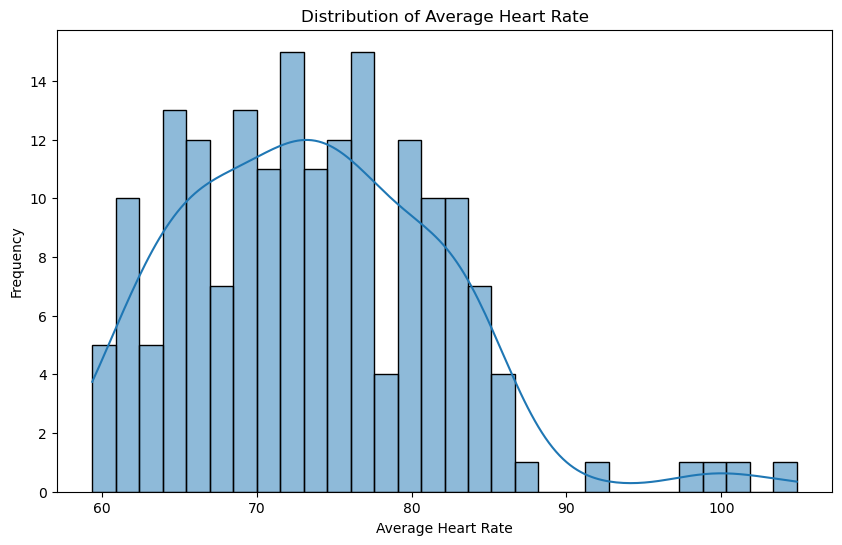

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(merged_data['AvgHeartRate'], bins=30, kde=True)
plt.title('Distribution of Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Frequency')
plt.show()


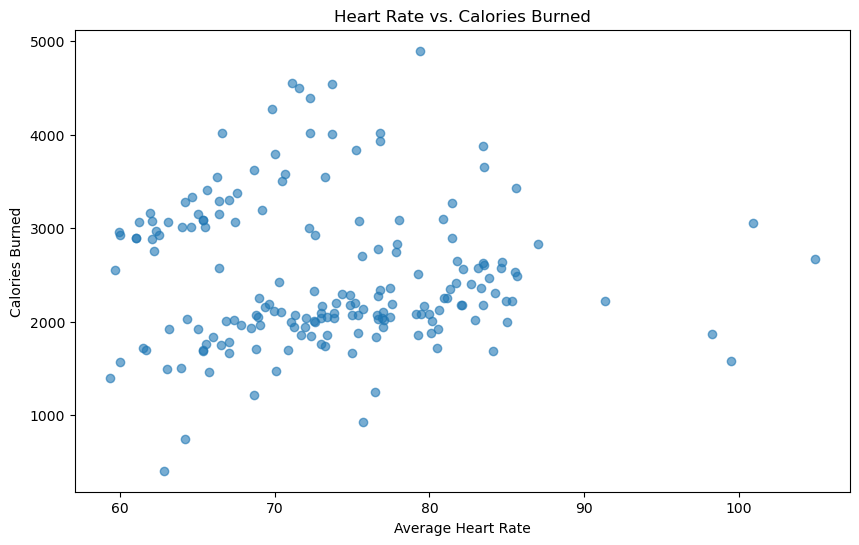

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(merged_data['AvgHeartRate'], merged_data['Calories'], alpha=0.6)
plt.title('Heart Rate vs. Calories Burned')
plt.xlabel('Average Heart Rate')
plt.ylabel('Calories Burned')
plt.show()


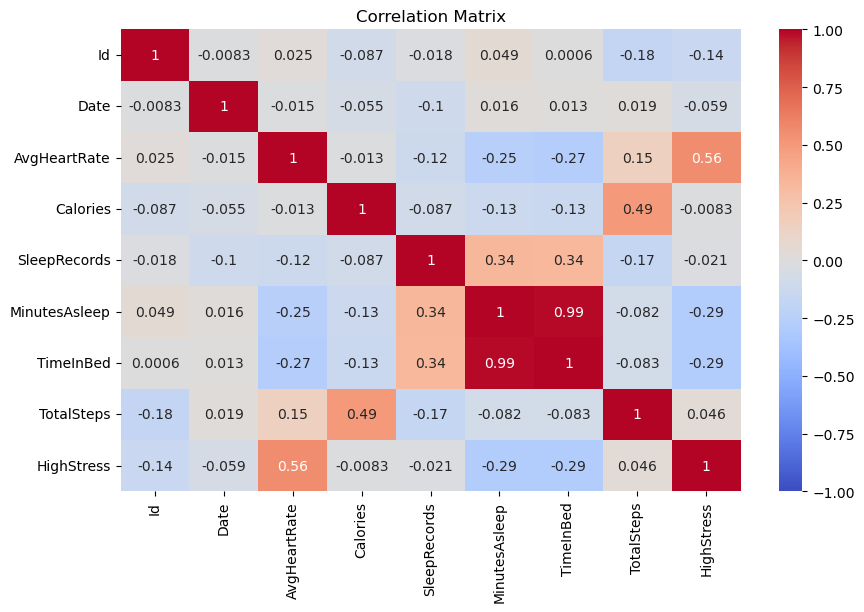

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


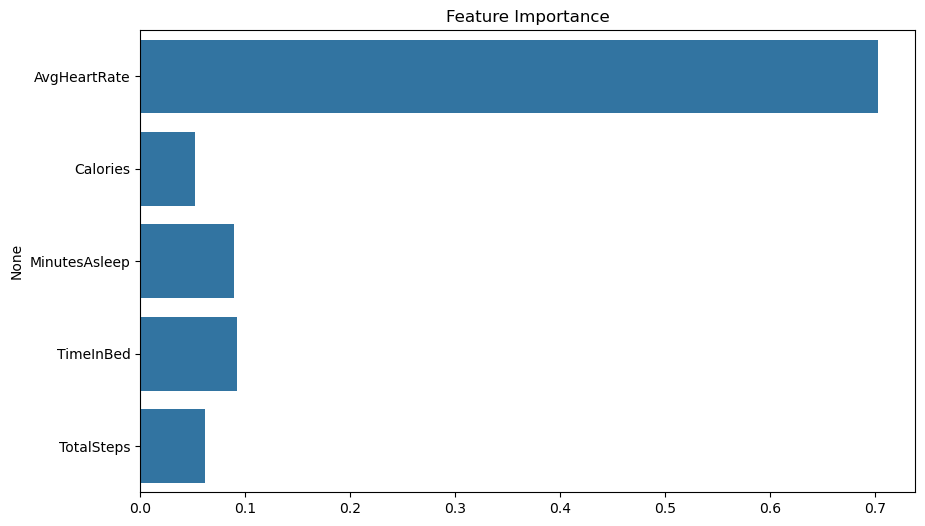

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


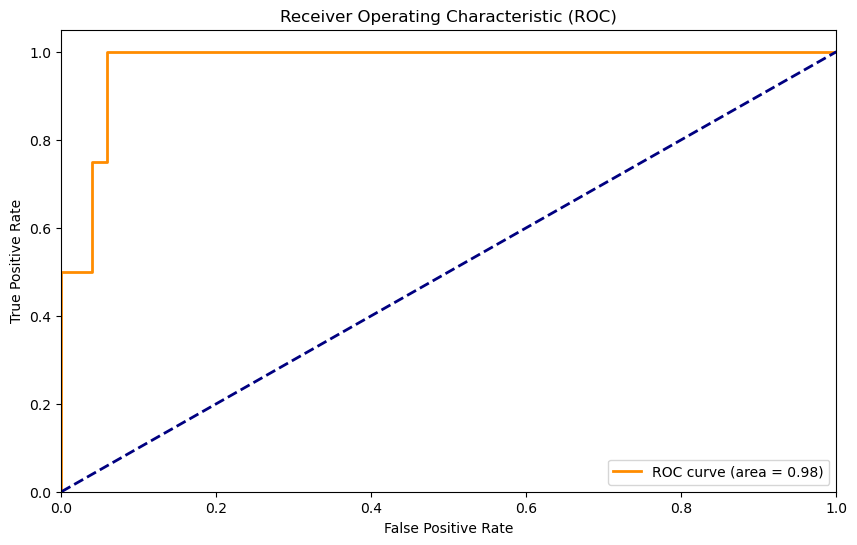

In [19]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:,1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


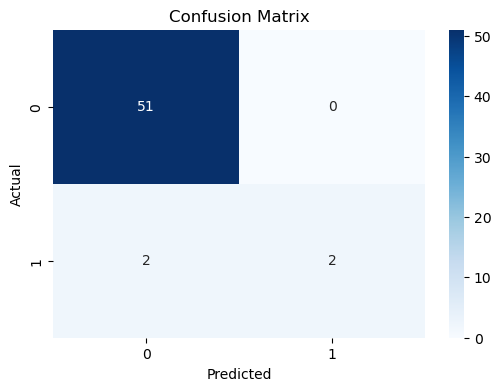

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


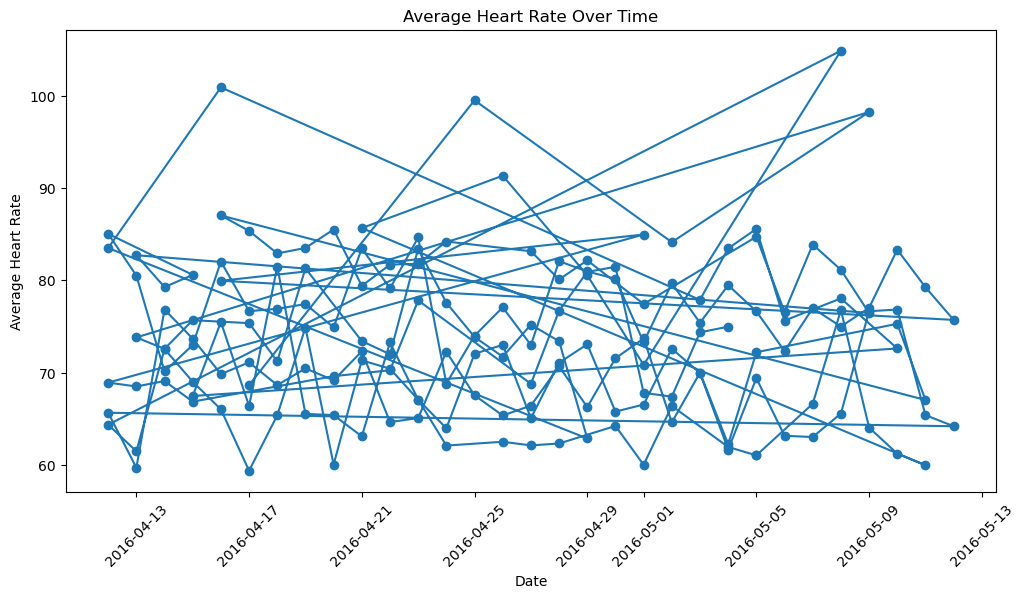

In [21]:
plt.figure(figsize=(12,6))
plt.plot(merged_data['Date'], merged_data['AvgHeartRate'], marker='o')
plt.title('Average Heart Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Average Heart Rate')
plt.xticks(rotation=45)
plt.show()
